# Saves a Sample Dataset for FairFace

- 10 from each ethnicity

In [1]:
import sys
sys.path.append('..')

In [16]:
from src.data_loader import FairFaceData
import pandas as pd
from pathlib import Path

In [3]:
fface = FairFaceData(root = '..')

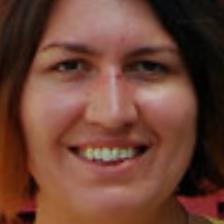

In [35]:
fface[23][0]

In [41]:
whitedata.indices

Int64Index([    5,     8,    15,    23,    24,    26,    27,    32,    40,
               55,
            ...
            97667, 97671, 97675, 97680, 97681, 97687, 97689, 97691, 97693,
            97694],
           dtype='int64', name='index', length=18612)

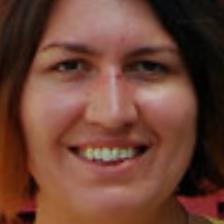

In [39]:
whitedata[3][0]

In [8]:
fface.attr_map

{'age': {'50-59': 0,
  '30-39': 1,
  '3-9': 2,
  '20-29': 3,
  '40-49': 4,
  '10-19': 5,
  '60-69': 6,
  '0-2': 7,
  'more than 70': 8},
 'gender': {'Male': 1, 'Female': 0},
 'race': {'East Asian': 0,
  'Indian': 1,
  'Black': 2,
  'White': 3,
  'Middle Eastern': 4,
  'Latino_Hispanic': 5,
  'Southeast Asian': 6},
 'service_test': {True: 0, False: 1}}

In [29]:
# seperate 
eadata = fface.filter_dataset(filter_={'race': 'East Asian'})
inddata = fface.filter_dataset(filter_={'race': 'Indian'})
whitedata = fface.filter_dataset(filter_={'race': 'White'})
blackdata = fface.filter_dataset(filter_={'race': 'Black'})
medata = fface.filter_dataset(filter_={'race': 'Middle Eastern'})
lhdata = fface.filter_dataset(filter_={'race': 'Latino_Hispanic'})
sedata = fface.filter_dataset(filter_={'race': 'Southeast Asian'})
datasets = [eadata, inddata, whitedata, blackdata, medata, lhdata, sedata]

In [54]:
# save dataframe reference & images
data_path = Path('../data_sample/fairface-img-margin025-trainval/')
(data_path / 'train').mkdir(exist_ok=True, parents=True)
(data_path / 'val').mkdir(exist_ok=True, parents=True)

df = pd.DataFrame()
for dset in datasets:
    first_10 = dset.indices[:10]
    tmp_df = fface.attr_filter_orig.iloc[first_10]
    print(tmp_df)
    df = pd.concat([df, tmp_df])
    for idx in range(len(first_10)):
        filepath = data_path / tmp_df['file'].iloc[idx]
        dset[idx][0].save(filepath)
        
df.to_csv('../data_sample/fairface_label_train.csv', index = False)
# dummy empty for val
pd.DataFrame(columns = df.columns).to_csv('../data_sample/fairface_label_val.csv', index = False)

               file    age  gender        race  service_test
index                                                       
0       train/1.jpg  50-59    Male  East Asian          True
10     train/11.jpg  50-59    Male  East Asian          True
11     train/12.jpg  20-29    Male  East Asian         False
31     train/32.jpg  10-19  Female  East Asian          True
34     train/35.jpg  20-29    Male  East Asian          True
46     train/47.jpg  60-69    Male  East Asian          True
50     train/51.jpg    3-9  Female  East Asian         False
53     train/54.jpg  30-39  Female  East Asian         False
60     train/61.jpg    3-9    Male  East Asian         False
64     train/65.jpg  30-39    Male  East Asian          True
               file    age  gender    race  service_test
index                                                   
1       train/2.jpg  30-39  Female  Indian         False
3       train/4.jpg  20-29  Female  Indian          True
4       train/5.jpg  20-29  Female  Indi

In [26]:
# load to test
fface_sample = FairFaceData(root = '..', sample = True)

In [28]:
len(fface_sample)

70